# Bayes Rule

> Being a Frequentist is all about evaluating what happens if I do this procedure in long-run practice across a population of situations, and choosing procedures that work well across this population; then, when faced with one real situation, assume that this one situation is randomly drawn from all possible situations; subtleties involve conditioning on observed aspects of the real situation to choose more apposite procedures. Bayesians attempt to condition on everything that is known, implying that everything that is unknown has a distribution.
> 
> Quote from Donald Rubin

# Graphical Summary

![fig](./graphical_summary/Slide23.png)

# Key Formula

$$
P(\theta|D) = \frac{P(D|\theta) × P(\theta)} {P(D)}
$$

- $P(\theta|D)$ is the posterior (probability of parameter $\theta$ given data $D$)
- $P(D|\theta)$ is the likelihood (probability of observing data $D$ given parameter $\theta$)
- $P(\theta)$ is the prior (initial belief about parameter $\theta$)
- $P(D)$ is the evidence/marginal likelihood (total probability of observing data $D$)

# Technical Details

- Interpretation:
  - Bayes’ Rule allows learning from data by adjusting prior beliefs with evidence.
  - Posterior probabilities quantify uncertainty about hypotheses or parameters conditioned on all known information.
  - Unlike frequentist approaches, Bayesian inference treats parameters as random variables with probability distributions, enabling direct probabilistic statements about parameters.
- Applications in statistical genetics:
  - Inferring the probability that a genetic variant affects a trait given observed data.
  - Incorporating prior biological knowledge (e.g., functional annotations) in association studies.
  - Performing fine-mapping to prioritize causal variants among many candidates.

# Example

In this example, we use Bayes’ Rule to update our belief about whether a single SNP affects a trait. Starting with a low prior belief (1%) that the SNP is causal, we observe data that is 30 times more likely under the causal model than under the null. Applying Bayes’ Rule, we update the posterior probability to 23%, reflecting stronger—but still uncertain—evidence for association. This illustrates how prior beliefs and observed data combine to yield a principled, quantitative update in Bayesian inference.

- Model 1: The SNP is associated with the trait
- Model 2: The SNP is not associated with the trait


In [2]:
# Prior belief: before seeing the data, we think it's unlikely this SNP is truly associated
prior_model1 <- 0.01    # 1% chance this model is true
prior_model2 <- 0.99    # 99% chance the null model is true


In [3]:
# Likelihoods: how well does the observed data fit each model?
# For example, based on effect size or p-value summary
likelihood_model1 <- 0.30   # P(data | Model 1)
likelihood_model2 <- 0.01   # P(data | Model 2)


In [4]:
# Bayes Rule: compute posterior probability for Model 1
numerator <- prior_model1 * likelihood_model1
denominator <- prior_model1 * likelihood_model1 + prior_model2 * likelihood_model2
posterior_model1 <- numerator / denominator

# Result
cat("Posterior probability that THIS SNP affects the trait:", round(posterior_model1, 3), "\n")


Posterior probability that THIS SNP affects the trait: 0.233 


# Supplementary
## Graphical Summary

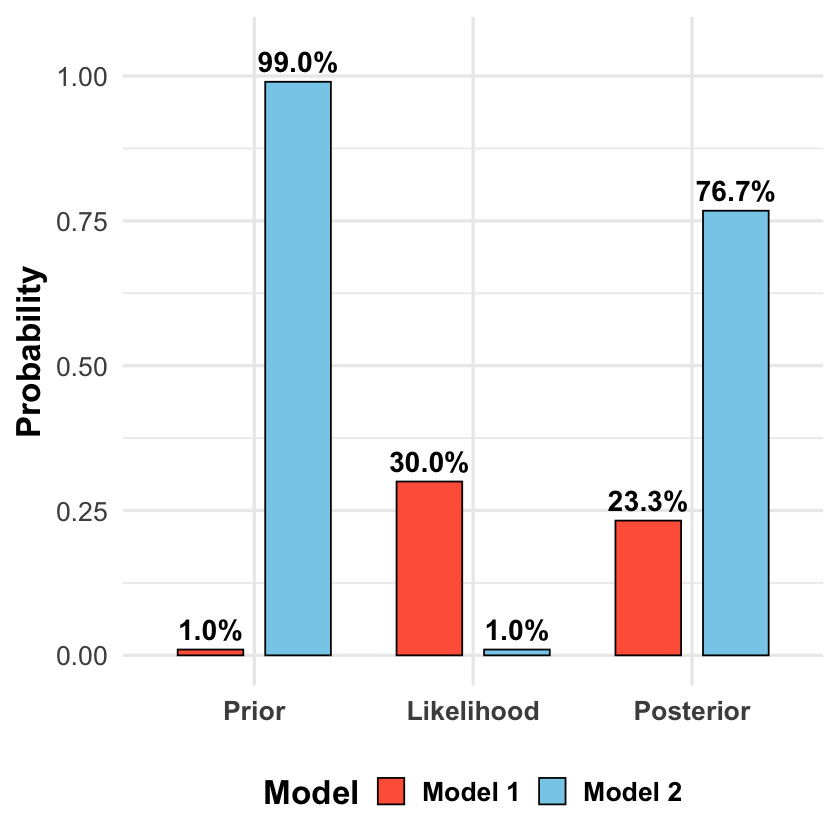

In [3]:
library(ggplot2)
library(dplyr)

# Data: Model 1 and Model 2 values for Prior, Likelihood, Posterior
df <- data.frame(
  Model = rep(c("Model 1", "Model 2"), each = 3),
  Stage = rep(c("Prior", "Likelihood", "Posterior"), times = 2),
  Probability = c(
    0.01, 0.30, NA,  # Model 1: prior, likelihood, posterior (to calculate)
    0.99, 0.01, NA   # Model 2: prior, likelihood, posterior (to calculate)
  )
)

# Calculate posterior probabilities using Bayes Rule
numerator_m1 <- df$Probability[df$Model == "Model 1" & df$Stage == "Prior"] * 
                df$Probability[df$Model == "Model 1" & df$Stage == "Likelihood"]
numerator_m2 <- df$Probability[df$Model == "Model 2" & df$Stage == "Prior"] * 
                df$Probability[df$Model == "Model 2" & df$Stage == "Likelihood"]
denominator <- numerator_m1 + numerator_m2

posterior_m1 <- numerator_m1 / denominator
posterior_m2 <- numerator_m2 / denominator

# Fill posterior values
df$Probability[df$Model == "Model 1" & df$Stage == "Posterior"] <- posterior_m1
df$Probability[df$Model == "Model 2" & df$Stage == "Posterior"] <- posterior_m2

df$Stage <- factor(df$Stage, levels = c("Prior", "Likelihood", "Posterior"))

# Plot
p_bayes <- ggplot(df, aes(x = Stage, y = Probability, fill = Model)) +
  geom_col(position = position_dodge(width = 0.8), width = 0.6, color = "black") +
  geom_text(aes(label = scales::percent(Probability, accuracy = 0.1)), 
            position = position_dodge(width = 0.8), vjust = -0.5, size = 6, fontface = "bold") +
  scale_fill_manual(values = c("tomato", "skyblue")) +
  labs(
    y = "Probability",
    x = NULL,
    fill = "Model"
  ) +
  ylim(0, 1.05) +
  theme_minimal(base_size = 20) +
  theme(
    plot.title = element_blank(),
    axis.title.y = element_text(face = "bold"),
    axis.text.x = element_text(face = "bold"),
    legend.title = element_text(face = "bold"),
    legend.text = element_text(face = "bold"),
    legend.position = "bottom"
  )

# Display plot
print(p_bayes)

# Save plot to file
ggsave("./cartoons/Bayes_rule.png", plot = p_bayes,
       width = 10, height = 6, 
       bg = "transparent",
       dpi = 300)
